In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())
model.add(Dropout(0.5))

#Dense layer of 64 neurons
model.add(Dense(50,activation='relu'))

#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/10
170/170 [==============================] - ETA: 0s - loss: 0.6928 - accuracy: 0.5852

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


170/170 [==============================] - 275s 2s/step - loss: 0.6928 - accuracy: 0.5852 - val_loss: 0.6152 - val_accuracy: 0.6426
Epoch 2/10
170/170 [==============================] - ETA: 0s - loss: 0.5977 - accuracy: 0.6607

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


170/170 [==============================] - 266s 2s/step - loss: 0.5977 - accuracy: 0.6607 - val_loss: 0.5277 - val_accuracy: 0.6897
Epoch 3/10
170/170 [==============================] - ETA: 0s - loss: 0.4946 - accuracy: 0.7408

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


170/170 [==============================] - 253s 1s/step - loss: 0.4946 - accuracy: 0.7408 - val_loss: 0.4662 - val_accuracy: 0.7676
Epoch 4/10
170/170 [==============================] - ETA: 0s - loss: 0.4071 - accuracy: 0.8117

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


170/170 [==============================] - 253s 1s/step - loss: 0.4071 - accuracy: 0.8117 - val_loss: 0.3715 - val_accuracy: 0.8294
Epoch 5/10
170/170 [==============================] - 250s 1s/step - loss: 0.3666 - accuracy: 0.8299 - val_loss: 0.4595 - val_accuracy: 0.7765
Epoch 6/10
170/170 [==============================] - 334s 2s/step - loss: 0.3499 - accuracy: 0.8440 - val_loss: 0.3797 - val_accuracy: 0.8228
Epoch 7/10
170/170 [==============================] - ETA: 0s - loss: 0.3349 - accuracy: 0.8483

INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


170/170 [==============================] - 342s 2s/step - loss: 0.3349 - accuracy: 0.8483 - val_loss: 0.3350 - val_accuracy: 0.8434
Epoch 8/10
170/170 [==============================] - 241s 1s/step - loss: 0.3049 - accuracy: 0.8646 - val_loss: 0.3353 - val_accuracy: 0.8522
Epoch 9/10
170/170 [==============================] - 239s 1s/step - loss: 0.2792 - accuracy: 0.8792 - val_loss: 0.3526 - val_accuracy: 0.8368
Epoch 10/10
170/170 [==============================] - ETA: 0s - loss: 0.2757 - accuracy: 0.8779

INFO:tensorflow:Assets written to: model-010.model\assets


INFO:tensorflow:Assets written to: model-010.model\assets


170/170 [==============================] - 242s 1s/step - loss: 0.2757 - accuracy: 0.8779 - val_loss: 0.3279 - val_accuracy: 0.8500


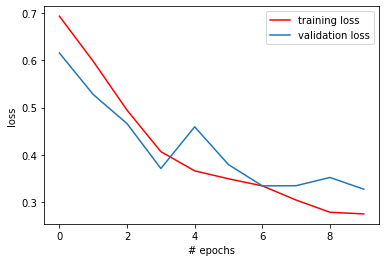

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

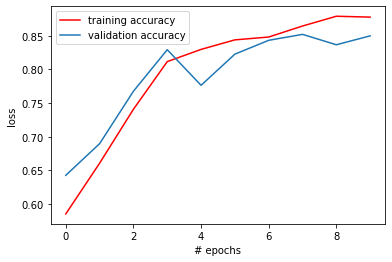

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

24/24 [==============================] - 8s 345ms/step - loss: 0.3533 - accuracy: 0.8519
[0.35332271456718445, 0.8518518805503845]
